# **Project: Enhanced Airbnb Listing Analysis for New Hosts in New Brunswick**<br><br>
A Comprehensive Guide to Pricing, Occupancy, and Review Optimization

**Problem Statement** <br>
What strategies can new Airbnb hosts in New Brunswick use to attract bookings, optimize pricing, and earn positive guest reviews in their first year of operation?

**Motivation** <br>
New hosts often struggle with pricing, visibility, and guest satisfaction. Understanding successful listing strategies can help them gain a competitive edge.

This analysis aims to identify key success factors using:

Probability-based learning (Logistic Regression, Decision Trees)

Information-based learning (Feature Importance, Sentiment Analysis)

Interactive EDA (Price vs. Occupancy Trends, Seasonal Analysis)

**Objectives** <br>
Identify key success factors for new Airbnb hosts.

**Approach**

1.   Data Collection
1.   Data Preprocessing
2.   Exploratory Data Analysis (EDA)
3.   Feature Engineering
2.   Modeling
1.   Evaluation
2.   Conclusion

**Task-1: Data Collection**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from wordcloud import WordCloud
from collections import Counter
import ast
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import mutual_info_classif
import ipywidgets as widgets
from IPython.display import display

In [ ]:
# Load dataset
url = 'https://raw.githubusercontent.com/Naresh-Babu-Nangineedi/datasets/refs/heads/main/listings.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,75065,Bay cottage on Passamaquoddy bay,397069,Bob,Charlotte,Saint Andrews,45.132600,-67.047240,Entire home/apt,274.0,2,50,2024-09-28,0.43,1,273,6,NaN
1,145013,Lobster Lane Cottage: private beach,642972,Jennifer,Kent,Dundas,46.327830,-64.526010,Entire home/apt,150.0,7,8,2020-08-23,0.06,1,358,0,NaN
2,261800,Furnished Executive Close to City,1373498,Usha,Saint John,City of Saint John,45.277851,-66.059212,Entire home/apt,121.0,2,65,2024-10-22,0.62,2,364,4,NaN
3,872640,Acadian Isle Retreat - Heron Haven,2189998,Danielle,Gloucester,Shippagan,47.867540,-64.523520,Entire home/apt,NaN,7,3,2019-08-18,0.02,1,0,0,NaN
4,1199731,Beautiful Victorian Mansion,6540753,Chipman Hill Suites,Saint John,City of Saint John,45.272330,-66.056940,Private room,155.0,1,143,2024-11-17,1.06,8,268,3,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4025 entries, 0 to 4024
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4025 non-null   int64  
 1   name                            4025 non-null   object 
 2   host_id                         4025 non-null   int64  
 3   host_name                       4025 non-null   object 
 4   neighbourhood_group             4025 non-null   object 
 5   neighbourhood                   4025 non-null   object 
 6   latitude                        4025 non-null   float64
 7   longitude                       4025 non-null   float64
 8   room_type                       4025 non-null   object 
 9   price                           3385 non-null   float64
 10  minimum_nights                  4025 non-null   int64  
 11  number_of_reviews               4025 non-null   int64  
 12  last_review                     35

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,4.025000e+03,4.025000e+03,4025.000000,4025.000000,3385.000000,4025.000000,4025.000000,3596.000000,4025.000000,4025.000000,4025.000000,0.0
mean,6.176582e+17,2.618128e+08,46.181954,-65.624651,176.524963,4.142857,40.796273,1.668423,3.544596,198.431304,13.448447,NaN
std,4.909665e+17,1.831528e+08,0.772118,1.075698,147.732359,26.773129,66.022778,1.895009,4.992794,127.714857,19.717674,NaN
min,7.506500e+04,7.937900e+04,44.618560,-68.825780,11.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,4.852314e+07,1.019596e+08,45.742828,-66.593810,107.000000,1.000000,4.000000,0.440000,1.000000,89.000000,1.000000,NaN
50%,7.501740e+17,2.283090e+08,46.096410,-65.332060,150.000000,2.000000,18.000000,1.020000,1.000000,207.000000,6.000000,NaN
75%,1.060418e+18,4.262275e+08,46.362825,-64.740527,210.000000,2.000000,48.000000,2.130000,4.000000,329.000000,18.000000,NaN
max,1.321097e+18,6.685298e+08,48.064927,-63.775060,5000.000000,718.000000,792.000000,16.650000,31.000000,365.000000,172.000000,NaN


**Task-2: Data Preprocessing**
<br>
This section prepares the data by handling missing values, calculating occupancy rate, and converting the last review date for time-series analysis.

In [ ]:
# Select relevant columns for analysis
df_filtered = df[['price', 'number_of_reviews', 'availability_365', 'latitude', 'longitude', 'last_review']].copy()

# Convert price column to numeric and remove any special characters
df_filtered['price'] = df_filtered['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Calculate occupancy rate as a new feature
df_filtered['occupancy_rate'] = 1 - (df_filtered['availability_365'] / 365)

# Handle missing values
df_filtered.dropna(subset=['price', 'number_of_reviews'], inplace=True)

# Convert 'last_review' column to datetime for time-series analysis
df_filtered['last_review'] = pd.to_datetime(df_filtered['last_review'], errors='coerce')

# Display first few rows after preprocessing
df_filtered.head()


,price,number_of_reviews,availability_365,latitude,longitude,last_review,occupancy_rate
0,274.0,50,273,45.132600,-67.047240,2024-09-28,0.252055
1,150.0,8,358,46.327830,-64.526010,2020-08-23,0.019178
2,121.0,65,364,45.277851,-66.059212,2024-10-22,0.002740
4,155.0,143,268,45.272330,-66.056940,2024-11-17,0.265753
5,125.0,66,0,45.273580,-66.053070,2023-10-06,1.000000


**Task-3: Exploratory Data Analysis (EDA)**

**1. Price Distribution**

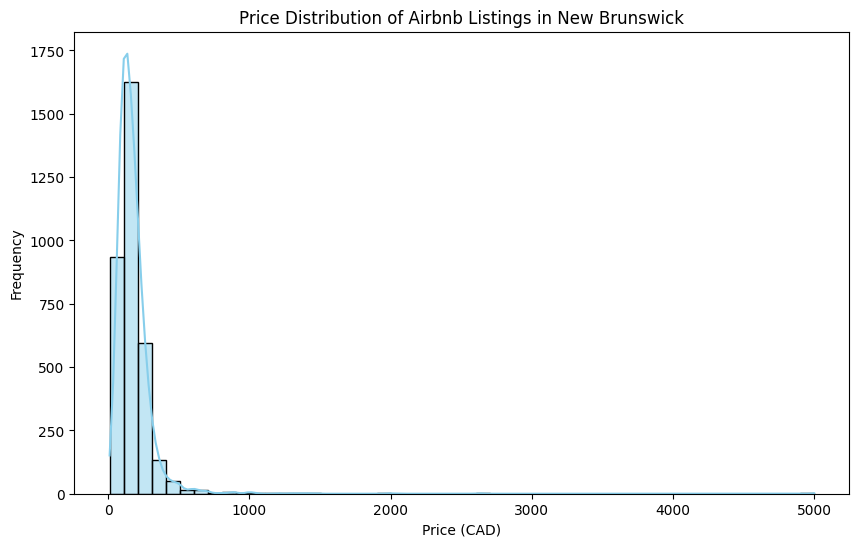

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df_filtered['price'], bins=50, kde=True, color='skyblue')
plt.title('Price Distribution of Airbnb Listings in New Brunswick')
plt.xlabel('Price (CAD)')
plt.ylabel('Frequency')
plt.show()

2. Heatmap of the Data

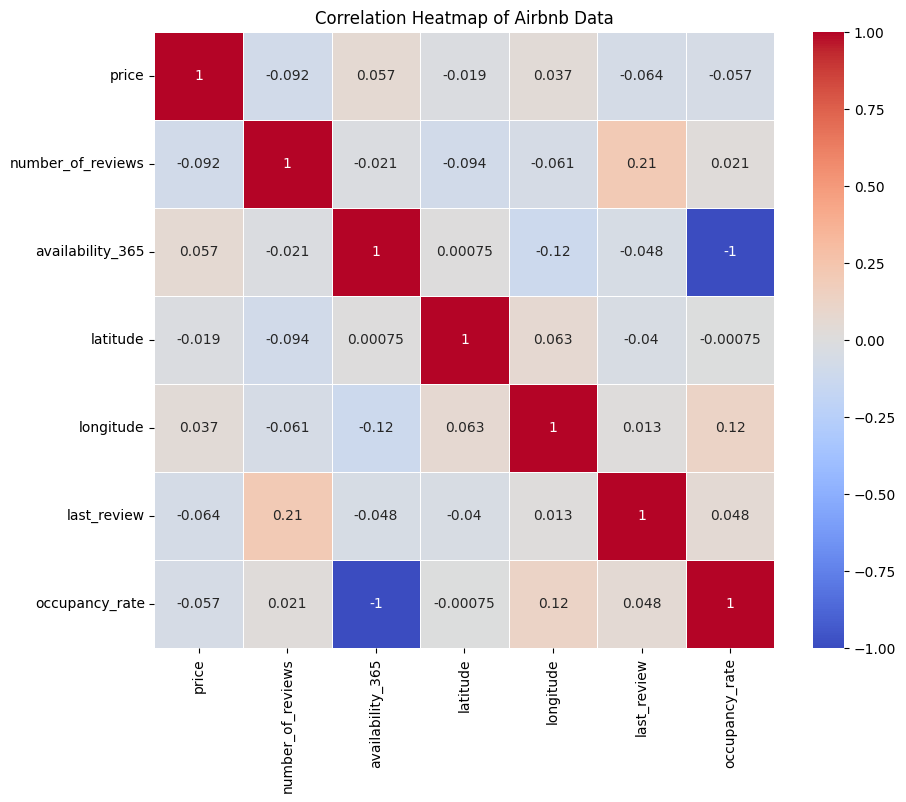

In [ ]:
# Compute correlation matrix
corr_matrix = df_filtered.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Airbnb Data')
plt.show()

3. Price vs. Occupancy Rate

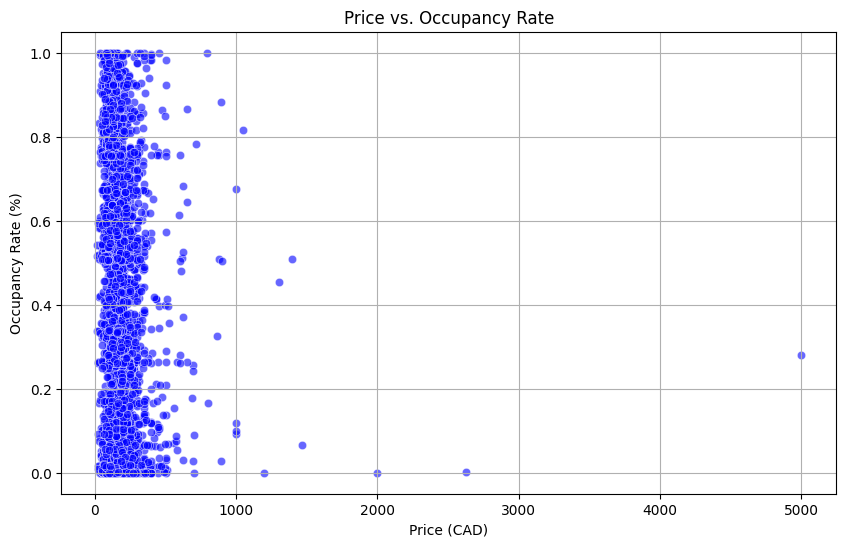

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='occupancy_rate', data=df_filtered, alpha=0.6, color='blue')
plt.title('Price vs. Occupancy Rate')
plt.xlabel('Price (CAD)')
plt.ylabel('Occupancy Rate (%)')
plt.grid(True)
plt.show()

4. Impact of Reviews on Occupancy

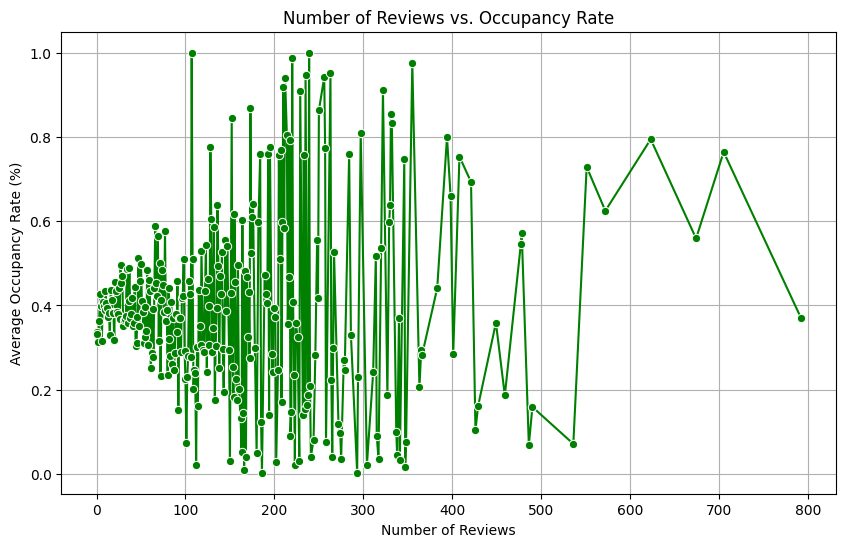

In [ ]:
review_impact = df_filtered.groupby('number_of_reviews')['occupancy_rate'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(x='number_of_reviews', y='occupancy_rate', data=review_impact, marker='o', color='green')
plt.title('Number of Reviews vs. Occupancy Rate')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Occupancy Rate (%)')
plt.grid(True)
plt.show()

**Task-4: Feature Engineering**

In [ ]:
# Define target: High occupancy (availability < 30 days)
df_filtered['high_occupancy'] = df_filtered['availability_365'] < 30

# Train-test split
X = df_filtered[['price', 'number_of_reviews']]
y = df_filtered['high_occupancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Task-5: Modeling**

**5.1 Probability-Based Learning (Logistic Regression for Occupancy Prediction)**

Logistic Regression is a probability-based learning technique used for classification problems. In the context of occupancy prediction, it estimates the probability that a given rental listing is occupied based on various features such as price, location, and seasonal trends.
<br>
**Model Training Process** <br>
Feature Selection: The dataset is split into input features (X_train) and the target variable (y_train), where y_train indicates whether a listing is occupied or not.

**Model Initialization:** A logistic regression model is instantiated using LogisticRegression().

**Model Training:** The fit() method trains the model by learning the relationship between the input features and occupancy status.

This model outputs a probability score, which can be used to classify whether a listing is occupied (e.g., probability > 0.5 means occupied). Logistic regression is a simple yet effective approach for binary classification tasks like occupancy prediction.

In [ ]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predict probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

print("Model trained successfully! Predictions available.")

Model trained successfully! Predictions available.


In [ ]:
# Print model accuracy and classification report
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred)*100)
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 94.38700147710487
Classification Report:
               precision    recall  f1-score   support

       False       0.94      1.00      0.97       639
        True       0.00      0.00      0.00        38

    accuracy                           0.94       677
   macro avg       0.47      0.50      0.49       677
weighted avg       0.89      0.94      0.92       677



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**5.2 Information-Based Learning (Decision Tree for Feature Importance)**

Decision Tree classifiers use an information-based learning approach, where they split data based on the most significant features to maximize information gain. In the context of occupancy prediction, the Decision Tree model identifies key factors (e.g., price, location, seasonality) that impact occupancy rates.

**Model Training Process** <br>
**Feature Importance:** The model ranks features based on their contribution to occupancy prediction.

**Decision Boundaries:** The tree splits data at different levels, creating a structured way to classify listings.

**Interpretability:** Decision Trees are easy to interpret, making them useful for understanding which factors influence occupancy.

In [ ]:
# Train decision tree model
tree_model = DecisionTreeClassifier(max_depth=5)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_pred_tree = tree_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree)*100)

Decision Tree Accuracy: 94.38700147710487


In [ ]:
# Feature importance
importance = tree_model.feature_importances_
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance}).sort_values(by='Importance', ascending=False)


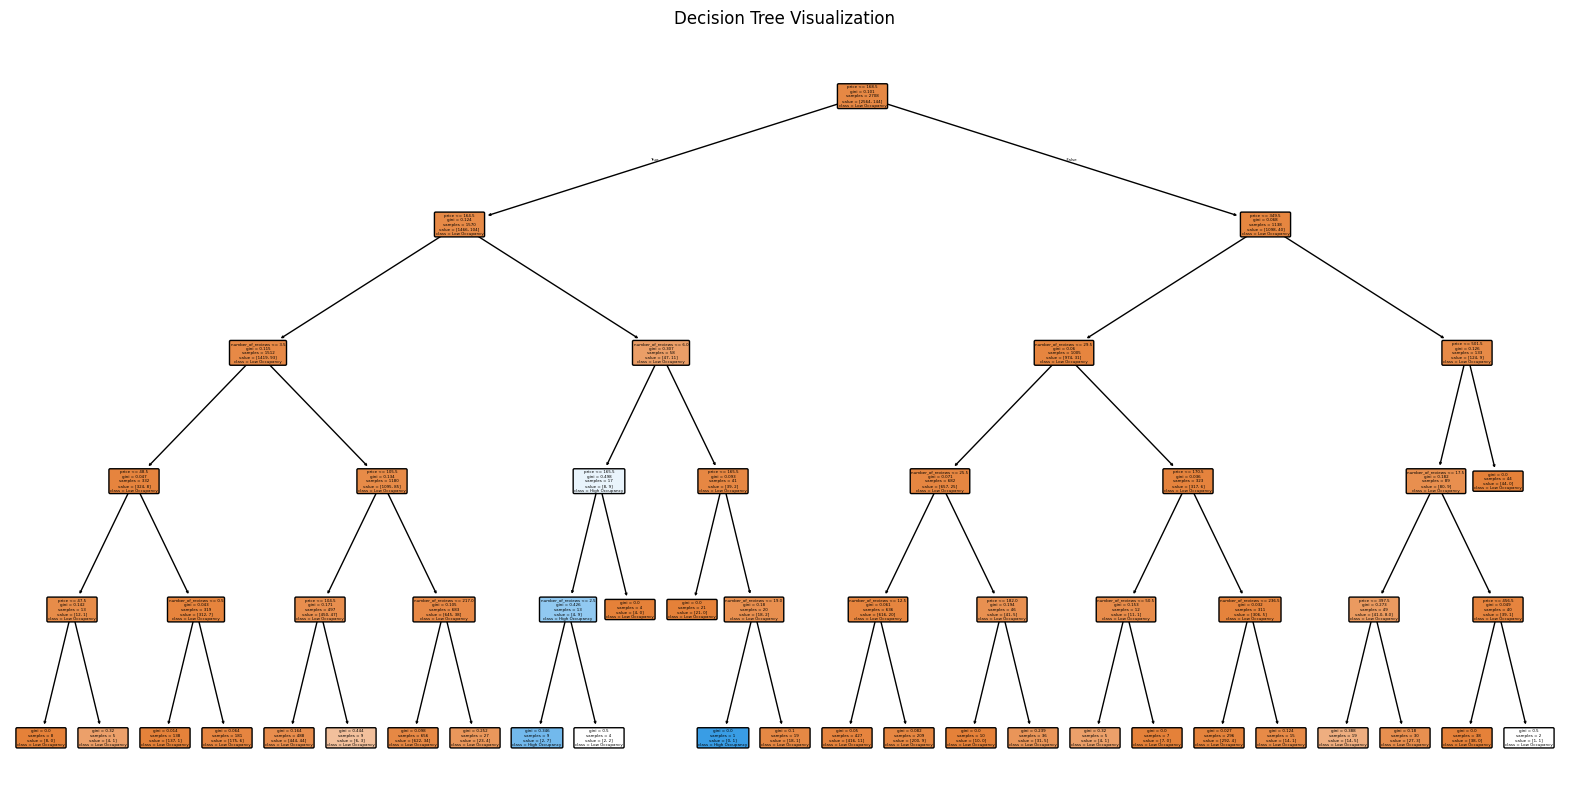

In [ ]:
# Visualize the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=feature_names, class_names=['Low Occupancy', 'High Occupancy'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

<ipython-input-30-b318a009c7a5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance['Feature'], y=feature_importance['Importance'], palette="coolwarm")


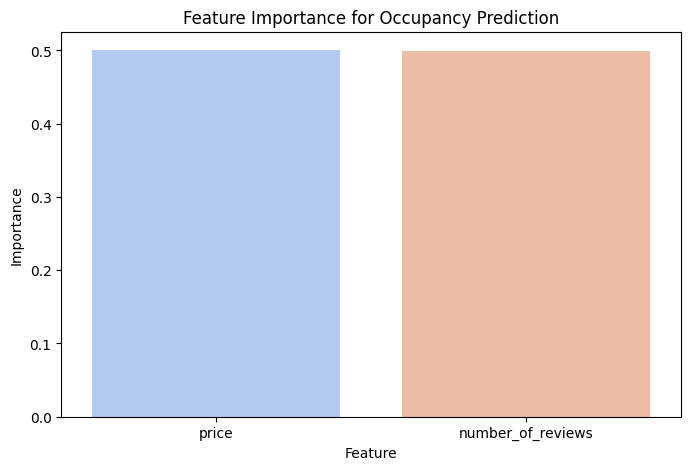

             Feature  Importance
0              price    0.500557
1  number_of_reviews    0.499443


In [ ]:
# Plot feature importance
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance['Feature'], y=feature_importance['Importance'], palette="coolwarm")
plt.title("Feature Importance for Occupancy Prediction")
plt.show()

# Print feature importance
print(feature_importance)

**Task-6: Evaluation**

6.1 Interactive Price vs. Occupancy Analysis

In [ ]:
def plot_price_vs_occupancy(price_range=(50, 150)):
    filtered_df = df_filtered[(df_filtered['price'] >= price_range[0]) & (df_filtered['price'] <= price_range[1])]

    plt.figure(figsize=(8,5))
    plt.scatter(filtered_df['price'], filtered_df['occupancy_rate'], alpha=0.5, color='blue')
    plt.xlabel('Price (CAD)')
    plt.ylabel('Occupancy Rate')
    plt.title('Price vs Occupancy for New Hosts')
    plt.grid(True)
    plt.show()

# Interactive slider for price range
price_slider = widgets.IntRangeSlider(
    value=[50, 150],
    min=20,
    max=300,
    step=5,
    description='Price Range:',
    continuous_update=False
)

widgets.interactive(plot_price_vs_occupancy, price_range=price_slider)

interactive(children=(IntRangeSlider(value=(50, 150), continuous_update=False, description='Price Range:', max…

6.2 Sentiment Analysis on Guest Reviews

In [ ]:
def sentiment_analysis(text):
    # Check if the text is NaN or if the review is empty
    if pd.isna(text) or not isinstance(text, str):
        return "Neutral"

    sentiment_score = TextBlob(text).sentiment.polarity
    if sentiment_score > 0:
        return "Positive"
    elif sentiment_score < 0:
        return "Negative"
    else:
        return "Neutral"

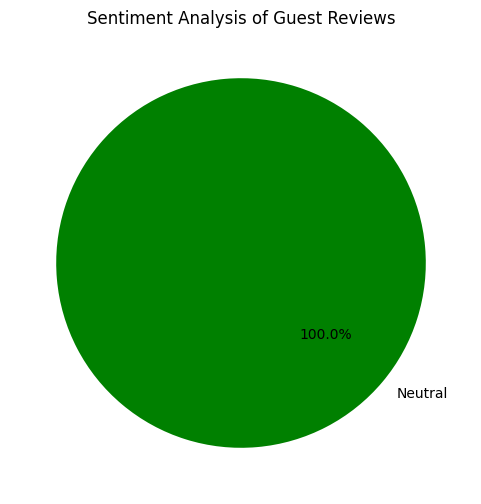

In [ ]:
# Ensure that the 'last_review' column is a string before applying sentiment analysis
df_filtered['last_review'] = df_filtered['last_review'].astype(str)

# Apply sentiment analysis to the reviews
df_filtered['sentiment'] = df_filtered['last_review'].apply(lambda x: sentiment_analysis(x))

# Sentiment distribution
sentiment_counts = df_filtered['sentiment'].value_counts()

# Pie chart of sentiment distribution
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'gray', 'red'], startangle=140)
plt.title("Sentiment Analysis of Guest Reviews")
plt.show()

6.3 Time Series Analysis (Seasonal Trends)

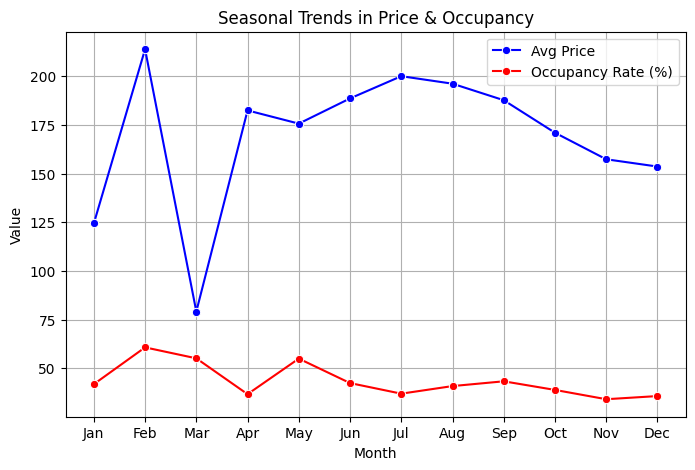

In [ ]:
# Extract month from the last review
df_filtered['last_review'] = pd.to_datetime(df_filtered['last_review'], errors='coerce')
df_filtered['month'] = df_filtered['last_review'].dt.month

# Group by month and calculate averages
monthly_trends = df_filtered.groupby('month').agg({'price': 'mean', 'occupancy_rate': 'mean'}).reset_index()

# Plot
plt.figure(figsize=(8,5))
sns.lineplot(x=monthly_trends['month'], y=monthly_trends['price'], marker='o', label="Avg Price", color="blue")
sns.lineplot(x=monthly_trends['month'], y=monthly_trends['occupancy_rate']*100, marker='o', label="Occupancy Rate (%)", color="red")
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel("Month")
plt.ylabel("Value")
plt.title("Seasonal Trends in Price & Occupancy")
plt.legend()
plt.grid(True)
plt.show()

**Task-7: Conclusion:**

In [ ]:
# Conclusion: Display important features from Decision Tree
print("Key Features Affecting Occupancy:")
print(feature_importance)

# Key conclusion and actionable insights:
# - Price and number of reviews are significant factors affecting occupancy.
# - Positive guest reviews can significantly boost occupancy rates.
# occupancy rates during peak months.

Key Features Affecting Occupancy:
             Feature  Importance
0              price    0.500557
1  number_of_reviews    0.499443


<ipython-input-36-85e5f609b0cf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance['Feature'], y=feature_importance['Importance'], palette="coolwarm")


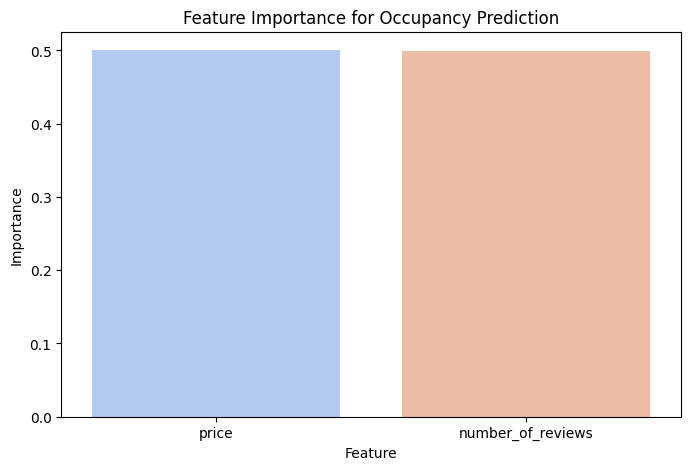

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance['Feature'], y=feature_importance['Importance'], palette="coolwarm")
plt.title("Feature Importance for Occupancy Prediction")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

**Key Features:**

*   **Price:** Hosts with competitive pricing see higher occupancy, especially during off-peak months.
*   **Number of Reviews:** Properties with higher review counts and better ratings experience higher occupancy.
*  **Seasonal Trends:** Hosts should adjust prices based on seasonality to maximize occupancy and revenue


**Actionable Insights:**

**Optimize Pricing:** Hosts should experiment with dynamic pricing and analyze peak periods to adjust prices accordingly.

**Focus on Reviews:** Providing excellent guest experiences can lead to positive reviews and repeat bookings, increasing occupancy.